In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import sys
import platform

2023-01-01 02:45:05.597480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-01 02:45:05.716119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 02:45:05.716137: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-01 02:45:06.234452: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")

Python Platform: Linux-5.15.79.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.9.15 (main, Nov 24 2022, 14:31:59) 
[GCC 11.2.0]


In [3]:
tf.get_logger().setLevel('INFO')

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [5]:
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import sys
import os

import matplotlib.pyplot as plt
import matplotlib as mpl


def escape():
    sys.exit()


In [6]:
import_directory = "/mnt/c/SPECTRE/Dataset/ISCX-2012/Processed/"
counter = 0
data_array = np.empty((0, 2))
files = os.listdir(import_directory)
for file in files:
    print('Opening File : ', file)
    data_set = np.load(import_directory+file,allow_pickle=True)
    data_array = np.vstack((data_array, data_set))

#separated = np.array([x for x in data_array if x[1] == 0])

Opening File :  destinationPayload_TestbedMonJun14Flows.xml.npy
Opening File :  destinationPayload_TestbedSatJun12Flows.xml.npy
Opening File :  destinationPayload_TestbedSunJun13Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-2Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-3Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-1Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-2Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-3Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-1Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-2Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-3Flows.xml.npy


In [7]:
#np.random.shuffle(separated)
np.random.shuffle(data_array)
print("ok")

ok


In [8]:
img_row = 50
img_col = 50

N = np.shape(data_array)[0]
train_test_split_percentage = 0.75

X_train = data_array[:int(N * train_test_split_percentage), 0]
X_test = data_array[int(N * train_test_split_percentage):, 0]

X_train = np.array([x.reshape(img_row, img_col, 3) for x in X_train])
X_test = np.array([x.reshape(img_row, img_col, 3) for x in X_test])

In [9]:
y_train = data_array[:int(N * train_test_split_percentage), 1]
y_test = data_array[int(N * train_test_split_percentage):, 1]

y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])

In [10]:
model_vgg19_conv = VGG19(include_top=False, weights='imagenet', input_shape=(img_col, img_row, 3))

2023-01-01 02:48:53.273408: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-01 02:48:53.273514: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 02:48:53.273540: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-01 02:48:53.273560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-01 02:48:53.273578: W tensorf

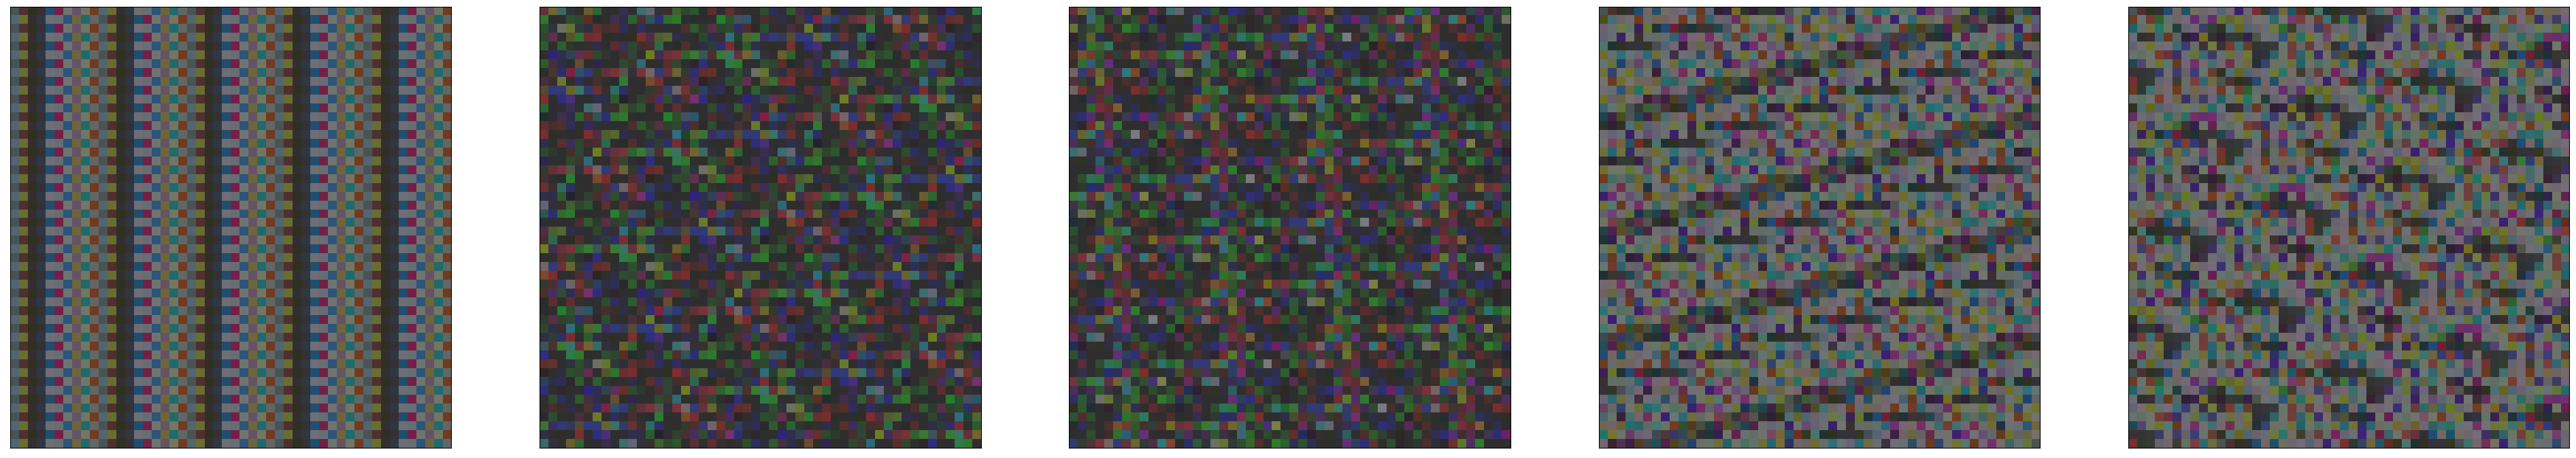

In [11]:
#ploting images for data
%matplotlib inline
n = 40  # how many digits we will display
plt.figure(figsize=(400, 150))
for i in range(6,11):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [12]:
for layer in model_vgg19_conv.layers:
    layer.trainable = False
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [13]:
#x = model_vgg19_conv.output
#x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(1, activation='sigmoid', name='predictions')(x)
#my_model = Model(inputs=model_vgg19_conv.input, outputs=x)
#my_model.summary()

#Revision 1
#x = model_vgg19_conv.output
#x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(80, activation='relu')(x)
#x = Dense(1, activation='sigmoid', name='predictions')(x)
#my_model = Model(inputs=model_vgg19_conv.input, outputs=x)
#my_model.summary()

#Revision 2
x = model_vgg19_conv.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid', name='predictions')(x)
my_model = tf.keras.Model(inputs=model_vgg19_conv.input, outputs=x)
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [16]:
my_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

batch_size = 32
epochs = 2

In [17]:
hist = my_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

2023-01-01 02:53:31.371931: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 3612570000 exceeds 10% of free system memory.


Epoch 1/2
    1/15053 [..............................] - ETA: 2:56:01 - loss: 0.0065 - accuracy: 1.0000

2023-01-01 02:53:42.103254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20480000 exceeds 10% of free system memory.
2023-01-01 02:53:42.124313: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20480000 exceeds 10% of free system memory.
2023-01-01 02:53:42.278811: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 20480000 exceeds 10% of free system memory.


15053/15053 [==============================] - 2278s 151ms/step - loss: 0.0370 - accuracy: 0.9908 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 2/2
15053/15053 [==============================] - 2185s 145ms/step - loss: 0.0374 - accuracy: 0.9908 - val_loss: 0.0338 - val_accuracy: 0.9914


In [18]:
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

In [19]:
score = my_model.evaluate(X_test, y_test, verbose=0)

In [20]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.033859364688396454
Test accuracy: 0.9909067749977112


In [24]:
training_loss= hist.history['loss']
val_loss= hist.history['val_loss'] 
training_acc= hist.history['acc'] 
val_acc= hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5)) 
plt.plot(xc,training_loss)
plt.plot(xc,val_loss) 
plt.xlabel('No. of Epochs') 
plt.ylabel('loss') 
plt.title('Training Loss vs Validation Loss') 
plt.grid(True) 
plt.legend(['Train','Val'])

plt.figure(2,figsize=(7,5)) 
plt.plot(xc,training_acc) 
plt.plot(xc,val_acc) 
plt.xlabel('No. of Epochs') 
plt.ylabel('Accuracy') 
plt.title('Training Accuracy vs Validation Accuracy') 
plt.grid(True) 
plt.legend(['Train','Val'],loc=4)

AttributeError: 'History' object has no attribute 'fit'

In [ ]:
checking_occurences = [x for x in y_test if x == 1]
print("total length = ",len(y_test))
print("Anomolies = ",len(checking_occurences))
print("Normal = ", (len(y_test) - len(checking_occurences)))

n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['Normal', 'Anomaly']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified by VGG19')
plt.show()

In [ ]:
predictions = my_model.predict(X_test)
print("Predictions = ",predictions)

In [ ]:
rounded = [[round(x[0])] for x in predictions]
from sklearn.metrics import f1_score
result = f1_score(y_test,rounded, average=None, labels = [0,1])
print("F1 = ",result)

In [ ]:
result = f1_score(y_test,rounded, average='macro')
print("F1 macro = ",result)

In [ ]:
result = f1_score(y_test,rounded, average='micro')
print("F1 Micro= ",result)

In [ ]:
result = f1_score(y_test,rounded, average='weighted')
print("F1 Weighted= ",result)

In [ ]:
import sklearn.metrics
target_names = ['normal','anomaly']
print(sklearn.metrics.classification_report(y_test,rounded,labels = [0,1], target_names=target_names))

In [ ]:
my_model.save("FYP_Finalhd5.hd5")
my_model.save("FYP_Finalh5.h5")

In [ ]:
from read_activations import get_activations, display_activations
v_index= 4
x_valid = X_train[:5]
a = get_activations(my_model, x_valid[v_index:v_index+1], print_shape_only=True)
display_activations(a)